In [9]:
import pandas as pd
df = pd.read_csv("datasets/expectativa_inflacao_24_meses.csv")
df["Suavizada"] = df["Suavizada"].map({"S": 1, "N": 0})
df.dropna(inplace=True)


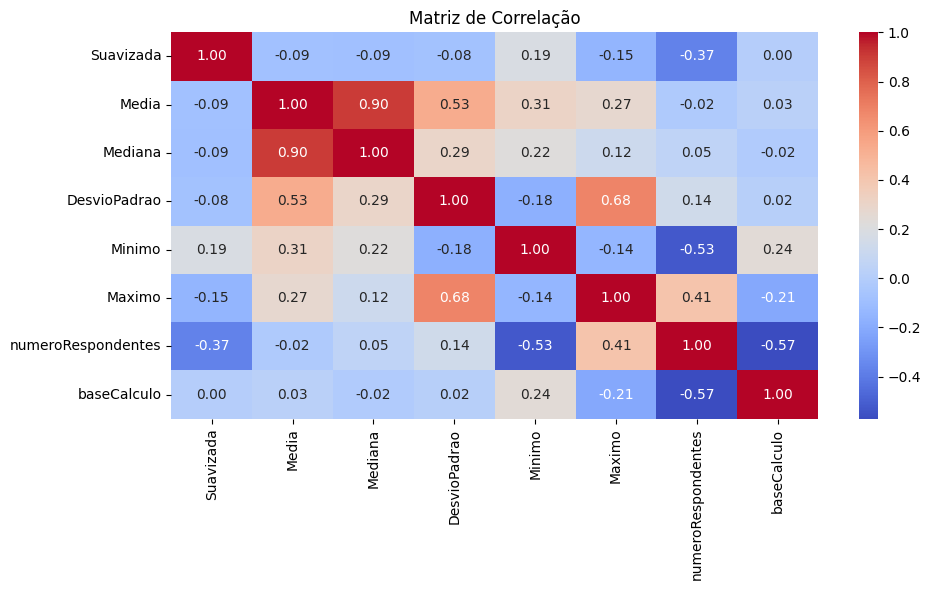

In [10]:
numericas = df.select_dtypes(include='number')

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(numericas.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de Correlação")
plt.tight_layout()
plt.show()


In [11]:
X = df[["Mediana", "DesvioPadrao", "Minimo", "Maximo", "numeroRespondentes", "baseCalculo", "Suavizada"]]
y = df["Media"]


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
from sklearn.linear_model import LinearRegression

modelo = LinearRegression()
modelo.fit(X_train, y_train)


LinearRegression()

In [14]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = modelo.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))


MSE: 0.0008252965082113034
R²: 0.9182412921865442


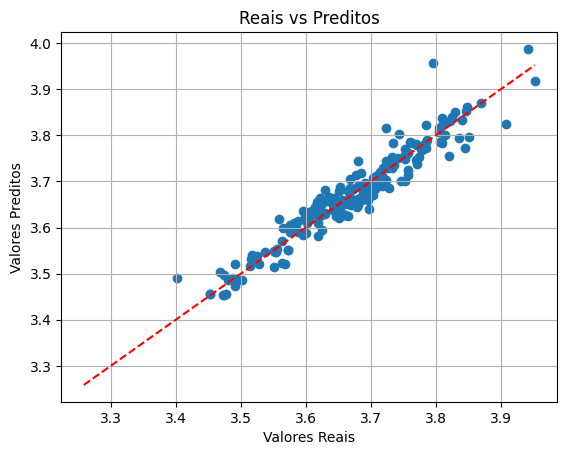

In [15]:
plt.scatter(y_test, y_pred)
plt.xlabel("Valores Reais")
plt.ylabel("Valores Preditos")
plt.title("Reais vs Preditos")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.grid()
plt.show()
